In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
sdf = pd.read_csv('student_data.csv')
sdf.head(10)

,Study Hours,Attendance Rate,Final Grade,Group
0,10,85,78,Group 1
1,12,90,82,Group 1
2,15,92,88,Group 1
3,8,70,65,Group 2
4,7,68,60,Group 2
5,6,60,55,Group 2
6,20,95,95,Group 3
7,18,92,93,Group 3
8,22,96,97,Group 3
9,14,89,85,Group 1


In [75]:
#theres no missing data in given csv file, so no need to check for it
#Supervised Learning: Train a Linear Regression model to predicting Final Grade based on Study Hours and Attendance Rate.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
X = sdf[['Study Hours', 'Attendance Rate']]
y = sdf['Final Grade']

#80% training 20% testing, reason?not sure, everyone seems to be using this ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
predictions = model.predict(X_test)
print(f"R² score: {r2_score(y_test, predictions)}")

R² score: 0.9913532744590822


In [79]:
#Unsupervised Learning
from sklearn.cluster import KMeans

In [80]:
X = sdf[['Study Hours', 'Attendance Rate']]
kmeans = KMeans(n_clusters=4)
sdf['Cluster'] = kmeans.fit_predict(X)

[[22.2972973  95.91891892]
 [ 7.03225806 65.03225806]
 [11.70588235 80.97058824]
 [16.55769231 89.82692308]]


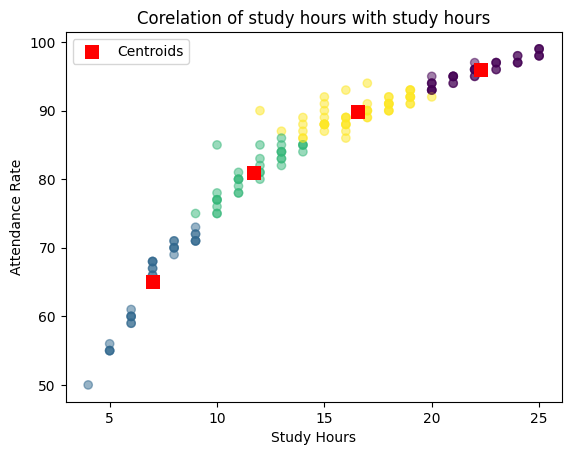

In [83]:
colors = ['red', 'blue', 'green', 'orange']

plt.scatter(sdf['Study Hours'], sdf['Attendance Rate'], c=sdf['Cluster'], cmap=plt.get_cmap('viridis', 4), alpha=0.5)
plt.xlabel('Study Hours')
plt.ylabel('Attendance Rate')

centroids = kmeans.cluster_centers_
print(centroids)    #coordinates dinxa cluster ko centroid ko
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='+', label='Centroids', lw=10)
plt.title('Corelation of study hours with study hours')

plt.legend()

plt.show()


